In [2]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
# import cv2

In [3]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [45]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    
    # tf.image.resize_images(images, (224, 224))
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [200,200],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [81]:
content_image = load_image('girl.jpg')
style_image = load_image('Classic-painting-portrait-1.jpg')

In [82]:
content_image.shape

TensorShape([1, 200, 200, 3])

In [88]:
img = tf.io.read_file('girl.jpg')
img = tf.image.decode_image(img, channels=3)
# img.shape[0]

2048

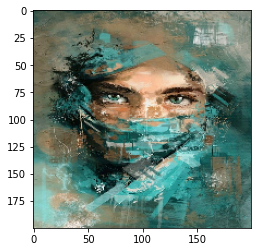

In [83]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [84]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

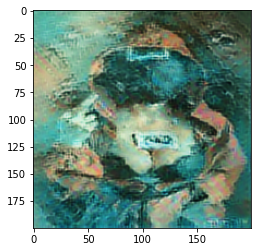

In [85]:
plt.imshow(np.squeeze(stylized_image))
plt.show()